# Number of Fundings

## Problem Statement :
#### Check the trend of investments over the years. To check the trend, find -
#### Total number of fundings done in each year.
#### Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
#### Print year-wise total number of fundings also. Print years in ascending order.

### Note :
#### There is some error in the 'Date' feature. Make sure to handle that.

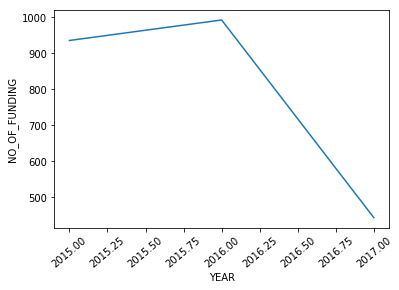

2015 936
2016 993
2017 443


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/startup_funding.csv')
df=iris.copy()
no_of_funding=[]
df['Date'].replace("12/05.2015","12/05/2015",inplace=True)
df['Date'].replace("13/04.2015","13/04/2015",inplace=True)
df['Date'].replace("15/01.2015","15/01/2015",inplace=True)
df['Date'].replace("22/01//2015","22/01/2015",inplace=True)
def f(s):   
    return s.split('/')[-1]
df['year']=df['Date'].apply(f)
a=df[df['year']=='2015']
first2015=a.year.count()
a=df[df['year']=='2016']
second2016=a.year.count()
a=df[df['year']=='2017']
third2017=a.year.count()
year=[2015,2016,2017]
no_of_funding.append(first2015)
no_of_funding.append(second2016)
no_of_funding.append(third2017)
plt.plot(year,no_of_funding)
plt.xticks(rotation=40)
plt.xlabel('YEAR')
plt.ylabel('NO_OF_FUNDING')
plt.show()
for i in  range(len(year)):
    print(year[i],no_of_funding[i])

# Top Indian Cities

## Problem Statement :
#### Find out which cities are generally chosen for starting a startup.
#### Find top 10 Indian cities which have most number of startups ?
#### Plot a pie chart and visualise it.
#### Print the city name and number of startups in that city also.

### Note :
#### Take city name "Delhi" as "New Delhi".
#### Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
#### For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
#### Print the city in descending order with respect to the number of startups.

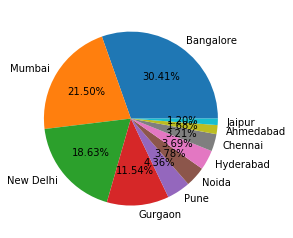

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_start=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/startup_funding.csv')
df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)
city_number=df_start['CityLocation'].value_counts()[0:10]
city=city_number.index
numCity=city_number.values
plt.pie(numCity,labels=city,autopct='%.2f%%')
plt.show()
for i in range(len(city)):
    print(city[i],numCity[i])

# Funding amount

## Problem Statement :
#### Find out if cities play any role in receiving funding.
#### Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).
#### Print the city and percentage with 2 decimal place after rounding off.

### Note:
#### Take city name "Delhi" as "New Delhi".
#### Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
#### For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
#### Print the city in descending order with respect to the percentage of funding.

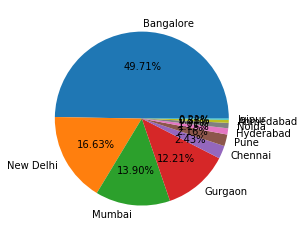

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/startup_funding.csv')
df=iris.copy()
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df['CityLocation'].replace('bangalore','Bangalore',inplace=True)
df['CityLocation'].replace(np.nan,'',inplace=True)
df['AmountInUSD'].replace(np.nan,'0',inplace=True)
def f(s):
    if s!='':
        return s.split('/')[0].strip()
    
def f1(s):
    if s==0:
        return s
    k=''
    a=s.split(',')
    for i in a:
        k+=i
    return int(k)
df['amount']=df['AmountInUSD'].apply(f1)
df['cities']=df['CityLocation'].apply(f)
city=df['cities'].value_counts()
newcity=city.index
totalsum=[]
for i in newcity:
    ef=df[df['cities']==i]
    ans=ef.amount.sum()
    totalsum.append(ans)
topcity=[]
topcityfund=[]
for i in range(10):
    maxi=-999999
    for j in range(len(totalsum)):
        if totalsum[j]>maxi:
            maxi=totalsum[j]
            index=j
    topcityfund.append(maxi)
    topcity.append(newcity[index])
    totalsum[index]=-9999999999999
plt.pie(topcityfund,labels=topcity,autopct='%.2f%%')
plt.show()
percent=[49.71,16.63,13.90,12.21,2.43,2.16,1.15,1.01,0.58,0.21]
for i in range(len(percent)):
    print(topcity[i],'{:.2f}'.format(percent[i]))

# Investment Type

## Problem Statement :
#### There are 4 different type of investments. Find out percentage of amount funded for each investment type.
#### Plot a pie chart to visualise.
#### Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

### Note :
#### Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
#### Print the investment type in descending order with respect to the percentage of the amount funded.

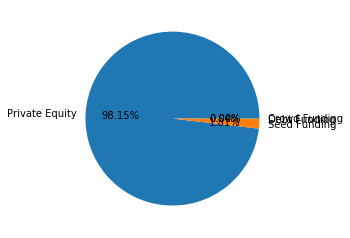

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/startup_funding.csv')
df=iris.copy()
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['AmountInUSD'].replace(np.nan,'0',inplace=True)
def f1(s):
    
    if s==0:
        return s
    k=''
    a=s.split(',')
    for i in a:
        k+=i
    return int(k)
df['amount']=df['AmountInUSD'].apply(f1)
invest=df.InvestmentType.value_counts()
listinvest=invest.index
listinvest
netamount=[]
for i in listinvest:
    ef=df[df['InvestmentType']==i]
    ans=ef.amount.sum()
    netamount.append(ans)
investfinal=[]
fundfinal=[]
for j in range(4):
    maxi=-9999
    for i in range(len(netamount)):
        if netamount[i]>maxi:
            maxi=netamount[i]
            index=i
    investfinal.append(listinvest[index])
    fundfinal.append(maxi)
    netamount[index]=-9999999
plt.pie(fundfinal,labels=investfinal,autopct='%.2f%%')
plt.show()
percent=[98.15,1.81,0.04,0.00]
for i in range(len(investfinal)):
    print(investfinal[i],'{:.2f}'.format(percent[i]))

# Top Industries

## Problem Statement :
#### Which type of companies got more easily funding. To answer this question, find -
#### Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)
#### Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

### Note :
#### Ecommerce is the right word in IndustryVertical, so correct it.
#### Print the industry in descending order with respect to the percentage of the amount funded.

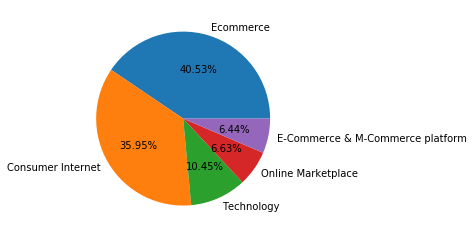

Ecommerce  40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/startup_funding.csv')
df=iris.copy()
df['IndustryVertical'].replace('eCommerce','Ecommerce ',inplace=True)
df['IndustryVertical'].replace('ECommerce','Ecommerce ',inplace=True)
df['IndustryVertical'].replace('ecommerce','Ecommerce ',inplace=True)
df['IndustryVertical'].replace('Ecommerce','Ecommerce ',inplace=True)
df['AmountInUSD'].replace(np.nan,'0',inplace=True)

induslist=df['IndustryVertical'].value_counts().index
totalamount=[]
def f1(s):
    
    if s==0:
        return s
    k=''
    a=s.split(',')
    for i in a:
        k+=i
    return int(k)
df['amount']=df['AmountInUSD'].apply(f1)

for i in induslist:
    ef=df[df['IndustryVertical']==i]
    ans=ef.amount.sum()
    totalamount.append(ans) 
top5indus=[]
top5funds=[]
for i in range(5):
    maxi=-9999
    for j in range(len(totalamount)):
        if totalamount[j]>maxi:
            maxi=totalamount[j]
            index=j
    top5indus.append(induslist[index])
    top5funds.append(maxi)
    totalamount[index]=-999999999999
plt.pie(top5funds,labels=top5indus,autopct='%.2f%%')
plt.show()
per=[40.53,35.95,10.45,6.63,6.44]
for i in range(len(per)):
    print(top5indus[i],per[i])

# Top startups

## Problem Statement :
#### Find top 5 startups with most amount of total funding.
#### Print the startup name in descending order with respect to amount of funding.

### Note:
#### Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
iris=pd.read_csv('C:/Users/Ankit Aggarwal/Desktop/startup_funding.csv')
df=iris.copy()
df['StartupName'].replace("Oyo Rooms","Oyo",inplace = True)
df['StartupName'].replace("OyoRooms","Oyo",inplace = True)
df['StartupName'].replace("OYO Rooms","Oyo",inplace = True)
df['StartupName'].replace("Oyorooms","Oyo",inplace = True)
df['StartupName'].replace("Ola Cabs","Ola",inplace = True)
df['StartupName'].replace("Olacabs","Ola",inplace = True)
df['StartupName'].replace("Flipkart.com","Flipkart",inplace = True)
df['StartupName'].replace("Paytm Marketplace","Paytm",inplace = True)
df['AmountInUSD'].replace(np.nan,'0',inplace=True)
startuplist=df.StartupName.value_counts().index
totalamount=[]
def f1(s):
    
    if s==0:
        return s
    k=''
    a=s.split(',')
    for i in a:
        k+=i
    return int(k)
df['amount']=df['AmountInUSD'].apply(f1)
for i in startuplist:
    ef=df[df['StartupName']==i]
    ans=ef.amount.sum()
    totalamount.append(ans)
top5starts=[]
top5funds=[]
for i in range(5):
    maxi=-9999
    for j in range(len(totalamount)):
        if totalamount[j]>maxi:
            maxi=totalamount[j]
            index=j
    top5starts.append(startuplist[index])
    top5funds.append(maxi)
    totalamount[index]=-999999999999
for i in top5starts:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


# Funding rounds

## Problem Statement :
#### Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
#### Print the startup name in descending order with respect to the number of funding round as integer value.

### Note:
#### Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.

In [27]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
def separate(city):
    return city.split("/")[0].strip()

startup_funding = pd.read_csv("C:/Users/Ankit Aggarwal/Desktop/startup_funding.csv")

startup_funding.StartupName.replace("Oyo Rooms","Oyo",inplace = True)
startup_funding.StartupName.replace("OyoRooms","Oyo",inplace = True)
startup_funding.StartupName.replace("OYO Rooms","Oyo",inplace = True)
startup_funding.StartupName.replace("Oyorooms","Oyo",inplace = True)
startup_funding.StartupName.replace("Ola Cabs","Ola",inplace = True)
startup_funding.StartupName.replace("Olacabs","Ola",inplace = True)
startup_funding.StartupName.replace("Flipkart.com","Flipkart",inplace = True)
startup_funding.StartupName.replace("Paytm Marketplace","Paytm",inplace = True)

dic = startup_funding.StartupName.value_counts()[0:5]

values = dic.values
index = dic.index

for i in range(len(dic)):
    print(index[i],int(values[i]))

Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


# Top Investor

## Problem Statement :
#### Find the Investors who have invested maximum number of times.
#### Print the investor name and number of times invested as integer value.

### Note:
#### In startup, multiple investors might have invested. So consider each investor for that startup.
#### Ignore the undisclosed investors.

In [29]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot as plt
import collections

def separate(city):
    return city.split("/")[0].strip()

startup_funding = pd.read_csv("C:/Users/Ankit Aggarwal/Desktop/startup_funding.csv")
startup_funding.InvestorsName.fillna("",inplace = True)
investors = startup_funding.InvestorsName

Investors_Name = []
for i in investors:
    if i != "":
        temp = i.split(",")
        for j in temp:
            Investors_Name.append(j.strip())
dic = {}
for i in Investors_Name:
    dic[i] = dic.get(i,0) + 1

dic_keys = sorted(dic,key=dic.get,reverse=True)
print(dic_keys[0],dic[dic_keys[0]])

Sequoia Capital 64
